# RIDGE REGRESYON
## MODEL KURMA

### Gerekli Kütüphaneler

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeCV

In [6]:
# Verisetindeki kategorik değişkenleri dummy değişkenlere çevir
# Dummy değişkenleri verisetinde tut
# Diğer değişkenleri ve bağımlı değişkeni bağımsız değişkenlerin dışında bırak
# Test Train ayrımını yap

In [7]:
df = pd.read_csv("verisetleri\Hitters.csv")
df = df.dropna()
# Kategorik değişkenleri dummy değişkene çevirdik. Kategorik değişkenlerin bize sağlıyacağı bilgiyi daha iyi almak için OneHut encoding yakalaşımı yapmış olduk. 
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
# Dummy değişkenleri veri setine aktarmadan önce veri setindeki bağımsız ve bağımlı değişkenleri çıkararak X_ değişkenine atadık.
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Dummy değişkenleri ile X_ yi birleştirdik.
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size=0.25,
random_state=42)

In [8]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [9]:
df.shape

(263, 20)

In [10]:
# Amacımız, "salary" oyuncuların maaşını ifade eder. Bu değeri diğer değişkenleri kullanarak tahmin etmeye çalışmak. Veriset Beyzbol oyuncularına ait veri setidir.
# Oyuncu transfer ederken oyuncuya ne kadar bedel belirtmemiz gerekir?

In [12]:
# HATIRLATMA : Model kurulmadan önce yapılması gereken işlemler
# Görselleştirme
# Betimsel istatistiklerine bakılması
# Birbirleriyle çaprazlanarak veri setinin daha yakından tanınması
# gibi KEŞİFÇİ VERİ ANALİZİ işlemlerininde gerçekleştirilmesi gerekir.

In [27]:
# Modelin kurulması
ridge_model = Ridge(alpha=5).fit(X_train, y_train)

In [28]:
ridge_model

Ridge(alpha=5)

In [29]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [30]:
# alpha parametresi değiştirerek farklı sonuçları gözlemleyin.
# alpha lambda ya karşılık gelmektedir.

In [31]:
ridge_model.intercept_

-3.4251968687162844

In [35]:
np.linspace(10, -2, 100) # rastgele sayılar üretir.

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [34]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5

In [36]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [37]:
# Yukarıdaki oluşturduğumuz birbirinden farklı lambda değerlerine karşı, bulunan katsayıları gözlemleyelim.

In [38]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

In [39]:
katsayilar

  0.00325215, -0.18347884,  0.49582229,  0.05207147,
         0.49852755,  0.35780758,  0.13050722,  0.29156508,  0.09017435,
        -0.03363913,  0.00485343, -0.01129272,  0.00286803]),
 array([ 0.48716485,  0.55008855,  0.05001106,  0.27373331,  0.16616941,
         0.32362115,  0.00664439, -0.20624638,  0.54243844,  0.03847238,
         0.54495307,  0.38421156,  0.1254093 ,  0.28786002,  0.10106927,
        -0.04436196,  0.00665481, -0.01472784,  0.00393228]),
 array([ 0.4489693 ,  0.65259294,  0.0547705 ,  0.31425899,  0.18207896,
         0.39644748,  0.01135508, -0.22590778,  0.58107838,  0.02069636,
         0.58985146,  0.40982593,  0.11684682,  0.28464147,  0.11252912,
        -0.05811777,  0.00906349, -0.01922258,  0.00535701]),
 array([ 0.3968063 ,  0.78060342,  0.06016408,  0.36183375,  0.20000384,
         0.48764781,  0.01772912, -0.24182798,  0.60954426, -0.00155238,
         0.63339787,  0.4345655 ,  0.10451029,  0.28195087,  0.12423297,
        -0.07562832,  0.0122782

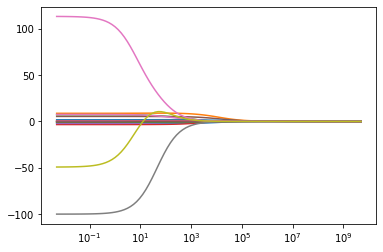

In [40]:
# Farklı lambda değerlerine karşılık olacak şekilde farklı katsayıların nasıl oluştuğunu gösteren grafik.
# y ekseni katsayıları, x ekseni lambdaları göstermektedir.
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

In [41]:
# Burada farklı lambda değerlerine karşılık gelen katsayıları gözlemlemiş olduk.

## TAHMİN

In [44]:
ridge_model = Ridge().fit(X_train, y_train)

In [45]:
# tahmin edilen değerler
y_pred = ridge_model.predict(X_train)

In [46]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [47]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

### TRAIN HATASI

In [48]:
# Train seti hataları - hata kareleri ortalaması karekökü
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))

In [49]:
RMSE

289.3447069600656

In [50]:
# Bu değer bizim train hatamızdır fakat henüz validate edilmemiştir.

In [52]:
from sklearn.model_selection import cross_val_score
np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))

123477.15188321876

In [53]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

351.3931585606338

In [54]:
# Burada ikinci kısımda elde ettiğimiz hata ilkinden elde ettiğimiz hatadan büyük olduğuna dikkat ediniz. Hatanın küçük olması doğru olduğu anlamına gelmez. İkinci bulduğumuz hata daha doğru hatadır.

### TEST HATASI

In [55]:
y_pred = ridge_model.predict(X_test)

In [56]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [57]:
RMSE

356.80829057302395

## MODEL TUNNING - İLK GERÇEK MODEL TUNNİNG İŞLEMİ OLACAK 

In [60]:
# İlk gerçek model tunning işlemi dememizin sebebi lambda parametresinin dışardan verilmesi ve en uygun olanı bulmamız gerekmesindendir.

In [58]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.80829057302395

In [61]:
ridge_model = Ridge(100).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

357.8154668279836

In [63]:
ridge_model = Ridge(1000).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

358.5637914255956

In [ ]:
# NEDEN MODEL TUNNING

# Modellemede kullanmamız gereken ve dışardan vermemiz gerken lambda değerinin bulunması gerekir. Bunun için birçok deneme yanılma işleminin yapılması gerekir. Bu işlem model tunning işlemidir. En uygun parametre değerini bulmaya çalışıyoruz.

In [65]:
lambdalar1 = np.random.randint(0, 1000, 100)

In [66]:
lambdalar2 = 100**np.linspace(10, -2, 100)*0.5

In [67]:
# Farklı lambda değerlerinin otomatik verilmesi

In [68]:
ridgecv=RidgeCV(alphas=lambdalar2, scoring="neg_mean_squared_error", cv=10, normalize=True)

In [69]:
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+19, 2.86118383e+19, 1.63727458e+19, 9.36908711e+18,
       5.36133611e+18, 3.06795364e+18, 1.75559587e+18, 1.00461650e+18,
       5.74878498e+17, 3.28966612e+17, 1.88246790e+17, 1.07721735e+17,
       6.16423370e+16, 3.52740116e+16, 2.01850863e+16, 1.15506485e+16,
       6.60970574e+15, 3.78231664e+15, 2.16438064e+15, 1.23853818e+15,
       7.08737081e+14, 4.05565415e+1...
       2.01850863e+00, 1.15506485e+00, 6.60970574e-01, 3.78231664e-01,
       2.16438064e-01, 1.23853818e-01, 7.08737081e-02, 4.05565415e-02,
       2.32079442e-02, 1.32804389e-02, 7.59955541e-03, 4.34874501e-03,
       2.48851178e-03, 1.42401793e-03, 8.14875417e-04, 4.66301673e-04,
       2.66834962e-04, 1.52692775e-04, 8.73764200e-05, 5.00000000e-05]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [70]:
# optimum parametre yani en iyi lambda değeri yani alfa
ridgecv.alpha_

0.6609705742330143

In [71]:
## FİNAL MODELİ BULUNAN OPTİMUM ALFA YA GÖRE;

In [72]:
ridge_tuned = Ridge(alpha=ridgecv.alpha_).fit(X_train, y_train)

In [73]:
# Final modeli üzerinden test hatası hesaplama
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.88036842428204

In [74]:
# lambdalar1 için işlemlerin yapılması

In [75]:
ridgecv1 =RidgeCV(alphas=lambdalar1, scoring="neg_mean_squared_error", cv=10, normalize=True)

In [76]:
ridgecv1.fit(X_train, y_train)

RidgeCV(alphas=array([ 95, 815, 425, 632, 894, 745,  69, 108, 765, 114, 361, 305, 114,
       347, 974, 671, 303, 719,  56, 984, 867, 883, 272, 885, 179, 897,
       888, 715, 724, 583, 618, 789, 447,  86, 679,  47, 524, 642, 557,
       452, 459, 580, 465, 273,  58, 728,   7, 244, 766, 261, 438, 811,
       712, 366, 528, 918, 227, 536, 915, 962, 327, 905, 248, 124, 637,
       111, 599, 429, 465, 230, 756, 539, 223, 290,  53, 573, 551, 882,
       506, 751, 328, 335, 820, 876, 260, 276, 202, 103, 103, 727, 944,
       954, 490, 210, 456, 860, 223, 589, 347, 509]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [77]:
ridgecv1.alpha_

7

In [78]:
ridge_tuned1 = Ridge(alpha=ridgecv1.alpha_).fit(X_train, y_train)

In [79]:
y_pred1 = ridge_tuned1.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred1))

356.33030600251544